In [94]:
import math
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

# Функциональное программирование

Работа с функциями в математическом смысле слова "функция"

- В отличие от императивного - "сделать А, потом Б". Процедурные и ООП стили всё равно относятся к императивному подходу.
- Некоторые принципы функционального подхода помогают разработке архитектуры императивных программ.
- В чисто функциональных языках возможны оптимизации с учётом свойств чистых функции.



## Функции - "объекты первого класса"
https://en.wikipedia.org/wiki/First-class_citizen

В Python функции - это объекты. Их можно присваивать переменным, хранить их в структурах данных, передавать их в качестве аргументов другим функциям и возвращать как результат работы методов и функций.



In [95]:
def f(x):
    return x**2

print(f.__name__)
print(f.__class__)
f

f
<class 'function'>


<function __main__.f(x)>

После определения функция существуюет как экземпляр класса function. Имя функции - всего лишь одна из переменных, ссылающихся на неё.

In [96]:
v = f
print(v.__name__)
v

f


<function __main__.f(x)>

In [97]:
v(2)

4

In [98]:
del f

In [99]:
try:
  print(f(2))
except Exception as e:
  print(e)

name 'f' is not defined


In [100]:
v(2)

4

In [101]:
from math import sin as s
s.__name__

'sin'

функции могут храниться в структурах данных

In [102]:
funcs = [v, np.sqrt, np.arange]
funcs

[<function __main__.f(x)>, <ufunc 'sqrt'>, <function numpy.arange>]

In [103]:
for f in funcs:
    print(f, f(2))

<function f at 0x7f61376a0430> 4
<ufunc 'sqrt'> 1.4142135623730951
<built-in function arange> [0 1]


In [104]:
funcs[1](2)

1.4142135623730951

### Анонимные функции

In [105]:
L = lambda x: x**2
print(L.__name__)
L

<lambda>


<function __main__.<lambda>(x)>

In [106]:
3**2, v(3), L(3)

(9, 9, 9)

In [107]:
(lambda x, y: x + y)(2, 3)

5

## Все функции чистые

Чистая функция: результат при одинаковых значеиях параметров всегда одинаковый и нет побочных эффектов.

Позволяет ввести ещё одно ограничение на синтаксис - переменные без возможности изменения их значения после создания.

В чисто функциональных языках - это важное ограничение. В python это не так.

Примеры не чистых функций:


In [108]:
from random import random
random()

0.9344857900291901

In [109]:
from datetime import datetime
datetime.now()

datetime.datetime(2022, 12, 13, 18, 12, 58, 854030)

In [110]:
def dirty_square(x):
  print("this is a side effect too")
  return x**2
a = dirty_square(3)

this is a side effect too


In [111]:
count = 0
def counter(n):
  global count
  count += n
  return count

print(counter(2))
print(counter(2))

2
4


## Рекурсия


In [112]:
def factorial(n):
  if n==0:
    return 1
  else:
    return n * factorial(n - 1)

factorial(4)

24

In [113]:
def factorial_tail(n, current_result=1):
  if n==0:
    return current_result
  else:
    return factorial_tail(n - 1, current_result*n)

factorial_tail(4)

24

In [114]:
def factorial_loop(n):
  f = 1
  for i in range(1, n+1):
    f *= i
  return f
factorial_loop(4)

24

In [115]:
n = 500
%timeit factorial(n)
%timeit factorial_tail(n)
%timeit factorial_loop(n)
factorial(n) == factorial_tail(n) == factorial_loop(n)

132 µs ± 1.61 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
159 µs ± 2.23 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
90 µs ± 26 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


True

In [116]:
# Измерение времени вычисления внутри программы
from time import sleep
%time sleep(0.1)
%timeit sleep(0.1)
from timeit import Timer
iterations, total = Timer("sleep(0.1)", globals={'sleep': sleep}).autorange()
total/iterations

CPU times: user 2.09 ms, sys: 2 µs, total: 2.1 ms
Wall time: 100 ms
100 ms ± 6 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


0.10054265200000145

In [117]:
iterations, total = Timer('factorial(500)', globals={'factorial': factorial}).autorange()
total/iterations

0.0001343854394999937

При необходимости, даже обход листа можно записать через рекурсию:

In [118]:
def recursive_double_list(a):
  if len(a) == 0:
    return []
  else:
    return [a[0]*2] + recursive_double_list(a[1:])

recursive_double_list([4, 5, 6])

[8, 10, 12]

## Задание 1

1. Напишите "наивную" рекуррентную функцию вычисления n-го [числа Фибоначчи](https://ru.wikipedia.org/wiki/%D0%A7%D0%B8%D1%81%D0%BB%D0%B0_%D0%A4%D0%B8%D0%B1%D0%BE%D0%BD%D0%B0%D1%87%D1%87%D0%B8). То есть функция которая для вычисления предыдущих чисел Фибоначчи просто вызывает саму себя.
2. Напишите рекуррентную функцию вычисления списка чисел Фибоначчи (от 0-го до n-го) по данному n
3. C помощью Timer и matplotlib нарисуйте график роста времени работы этих функций по мере увеличения n.


1

In [119]:
def fib1(n):
  if n==0:
    return 0
  if n in (1, 2):
    return 1
  return fib1(n-1)+fib1(n-2)
print(fib1(10))

55


2

In [120]:
def fib_list1(n: int) -> list:
    if n==0:
      return [0]
    if n == 1:
        return [0, 1]
    elif n == 2:
        return [0, 1, 1]
    li = fib_list1(n-1)
    li.append(li[-1] + li[-2])
    return li
fib_list1(10)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

3

In [121]:
import time
def my_timeit1(func):
  def count_time(x):
    start_t = time.time()
    func(x)
    return time.time() - start_t
  return count_time

In [122]:
def plot_discrete1(func, val=range(11)):
  y = [func(x) for x in val]
  plt.plot(val, y)

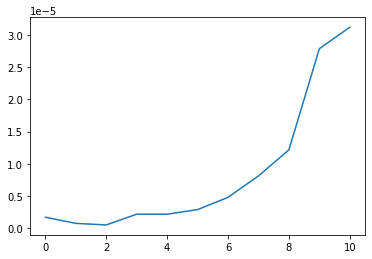

In [123]:
plot_discrete1(my_timeit1(fib1))

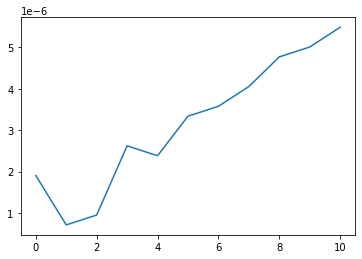

In [124]:
plot_discrete1(my_timeit1(fib_list1))

# Полезное отступление: итераторы, генераторы



### Итераторы и итерируемые

Итератор - объект с методом `__next__`, выдающим следующее по порядку значение. Функция `next()` вызывает этот метод итератора. Итераторы "одноразовые"

In [125]:
it = iter(['a', 'b', 'c'])
try:
  print(it.__next__())
  print(next(it))
  print(next(it))
  print(next(it))
except Exception as e:
  print(repr(e))

try:
  print(next(it))
except Exception as e:
  print(repr(e))


a
b
c
StopIteration()
StopIteration()


In [126]:
class MyCountdown:
  def __init__(self, n):
    self._n = n
  
  def __next__(self):
    self._n -= 1
    if self._n < 0:
      raise StopIteration()
    return self._n

In [127]:
timer = MyCountdown(5)
print(timer.__next__(), next(timer))
while True:
  try:
    print(next(timer))
  except StopIteration:
    break

4 3
2
1
0


Итерируемое - объект по которому можно создать итератор, вызывая метод `__iter__`.

В Питоне много итерируемых объектов. Цикл `for` на самом деле использует итератор!

Многие функции которые обычно применяют к списку и кортежу на самом деле могут работать с любым итерируемым объектом.

https://docs.python.org/3/library/functions.html#sum

другие функции для работы с итераторами в стандартной библиотеке https://docs.python.org/3/library/itertools.html

In [128]:
list.__iter__, range.__iter__, tuple.__iter__, dict.__iter__, np.ndarray.__iter__, pd.DataFrame.__iter__

(<slot wrapper '__iter__' of 'list' objects>,
 <slot wrapper '__iter__' of 'range' objects>,
 <slot wrapper '__iter__' of 'tuple' objects>,
 <slot wrapper '__iter__' of 'dict' objects>,
 <slot wrapper '__iter__' of 'numpy.ndarray' objects>,
 <function pandas.core.generic.NDFrame.__iter__(self)>)

In [129]:
{}.items().__iter__, pd.DataFrame([]).iterrows().__iter__

(<method-wrapper '__iter__' of dict_items object at 0x7f6137367a60>,
 <method-wrapper '__iter__' of generator object at 0x7f6137c70430>)

In [130]:
class MyTimer:
  def __init__(self, n):
    self._n = n
  
  def __iter__(self):
    return MyCountdown(self._n)

short_timer = MyTimer(3)

for t in short_timer:
  for t2 in short_timer:
    print(t, t2)
  print("kaboom")

2 2
2 1
2 0
kaboom
1 2
1 1
1 0
kaboom
0 2
0 1
0 0
kaboom


In [131]:
print(list(MyTimer(10)))
print(list(range(9, -1, -1)))


[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


### Генераторы

Функция, выдающая значения по одному, примерно как итератор. Написать проще, чем целый итерируемый класс.

In [132]:
def my_countdown(n, debug=False):
  i = n
  while i>0:
    i -= 1
    if debug:
      print('generating:', i)
    yield i
    if debug:
      print('generated:', i)
    
my_countdown

<function __main__.my_countdown(n, debug=False)>

In [133]:
my_countdown(10, True)

<generator object my_countdown at 0x7f6137c70350>

In [134]:
print(next(my_countdown(10, True)))
print(next(my_countdown(10, True)))

generating: 9
9
generating: 9
9


In [135]:
gen_obj = my_countdown(10, True)
next(gen_obj)

generating: 9


9

In [136]:
next(gen_obj)

generated: 9
generating: 8


8

In [137]:
tuple(my_countdown(5))

(4, 3, 2, 1, 0)

#### zip

In [138]:
from itertools import zip_longest

merged = list(zip(
    MyTimer(9),
    my_countdown(9),
    range(8, 0, -1),
    reversed(range(9))))
merged

[(8, 8, 8, 8),
 (7, 7, 7, 7),
 (6, 6, 6, 6),
 (5, 5, 5, 5),
 (4, 4, 4, 4),
 (3, 3, 3, 3),
 (2, 2, 2, 2),
 (1, 1, 1, 1)]

In [139]:
all([a==b and b==c and c==d for a, b, c, d in merged])

True

#### Генераторное выражение (generator expression) и списковое включение (list comprehension)

In [140]:
(i**2 for i in (1,2,3))

<generator object <genexpr> at 0x7f61373fb4a0>

In [141]:
listcomp = [i**2 for i in (1,2,3)]
genexpr = (i**2 for i in (1,2,3))

In [142]:
listcomp

[1, 4, 9]

In [143]:
genexpr

<generator object <genexpr> at 0x7f6137ba47b0>

In [144]:
next(genexpr), next(genexpr)

(1, 4)

In [145]:
list(genexpr)

[9]

### Генератор бесконечной последовательности

In [146]:
def powers_of_2():
  x = 1
  while True:
    yield x
    x = 2*x

powers_of_2()

<generator object powers_of_2 at 0x7f6137623740>

In [147]:
try:
  powers_of_2()[:10]
except Exception as e:
  print(repr(e))

TypeError("'generator' object is not subscriptable")


In [148]:
n = 0
for f in powers_of_2():
  print(n, f)
  n += 1
  if n>10:
    break

0 1
1 2
2 4
3 8
4 16
5 32
6 64
7 128
8 256
9 512
10 1024


In [149]:
for i, f in enumerate(powers_of_2()):
  print(i, f)
  if i>=10:
    break

0 1
1 2
2 4
3 8
4 16
5 32
6 64
7 128
8 256
9 512
10 1024


In [150]:
from itertools import islice
print(islice(powers_of_2(), 11))
list(islice(powers_of_2(), 11))

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

## Задание 2
Напишите генератор бесконечной последовательности чисел Фибоначчи начиная с 0-го.

In [151]:
def fib_gen1():
  a,b = 0,1
  while True:
    yield a
    a,b = b,a+b

list(islice(fib_gen1(), 11))

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

# Функции высшего порядка

Функции, которые в качестве аргументов принимают функции, называются *функциями высшего порядка*

## Функции могут принимать на вход функции

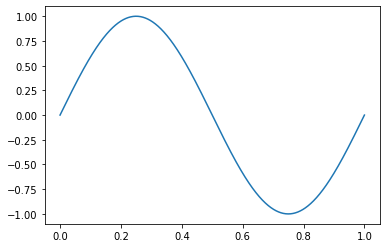

In [152]:
def plot(foo):
  x_space = np.linspace(0, 1, num=1000)
  y = [foo(x) for x in x_space]
  plt.plot(x_space, y)

my_sin = lambda x: math.sin(x*2*math.pi)
plot(my_sin)

Почему это спорный пример функционального программирования?

In [153]:
def sample_at_good_points(foo):
  return foo(0), foo(1/6*1/4), foo(1/4 * 1/4), foo(1/3 * 1/4)
print(sample_at_good_points(my_sin))

(0.0, 0.25881904510252074, 0.3826834323650898, 0.49999999999999994)


In [154]:
# не обязательно принимать одну функцию
def compare_on_01(model, candidates):
  return [
    all(
          (model(x) == foo(x) 
          for x in np.linspace(0, 1, num=1000))
        )
    for foo in candidates
  ]

In [155]:
compare_on_01(math.sin, [my_sin, np.sin])

[False, True]

## Функции могут возвращать функции

In [156]:
def parabola(a, b, c):
  def polynomial(x):
    return a * x**2 + b * x + c
  return polynomial

In [157]:
def parabola2(a, b, c):
  return lambda x: a * x**2 + b * x + c

In [158]:
compare_on_01(parabola(1, 2, 3), [parabola2(1, 2, 3)])

[True]

In [159]:
try:
  polynomial(5)
except Exception as e:
  print(e)

name 'polynomial' is not defined


In [160]:
v = parabola(1, 0, 0)
v

<function __main__.parabola.<locals>.polynomial(x)>

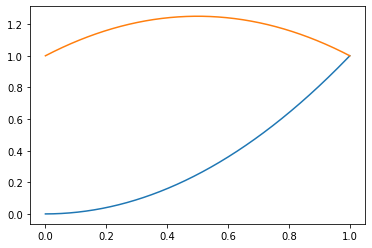

In [161]:
plot(v)
plot(parabola2(-1, 1, 1))

## Композиция

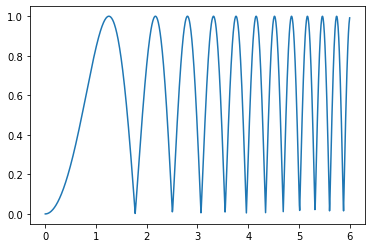

In [162]:
X = np.linspace(0, 6, num=1000)
plt.plot(X, np.abs(np.sin(X**2)))

<class 'function'>


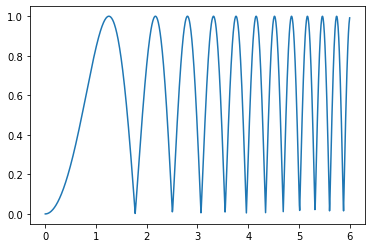

In [163]:
def compose(F, G):
  def composition(x):
    return F(G(x))
  return composition

abs_sin_x2 = compose(abs, compose(math.sin, lambda x: x**2))
print(type(abs_sin_x2))

y = [abs_sin_x2(x) for x in X]
plt.plot(X, y)

## Декоратор

Функция, принимающая на вход одну функцию и возвращающая функцию. Так она "декорирует" её работу.

In [164]:
def null_decorator(func):
  return func

def null_decorator2(func):
  def wrapper(*args, **kwargs):
    return func(*args, **kwargs)
  return wrapper

def some_f():
    return 'some text'

some_f()

'some text'

In [165]:
same_f = null_decorator(some_f)

same_f(), null_decorator2(some_f)()

('some text', 'some text')

In [166]:
@null_decorator
def different_f():
    return 'different text'
different_f()

'different text'

In [167]:
def uppercase(func):
    def wrapper(*args, **kwargs):
        original_result = func(*args, **kwargs)
        modified_result = original_result.upper()
        return modified_result
    return wrapper

@uppercase
def third_f():
    return 'hello world'

third_f()

'HELLO WORLD'

In [168]:
def scale_by_tau(foo):
  def wrapped_func(x):
    return foo(x*2*math.pi)
  return wrapped_func

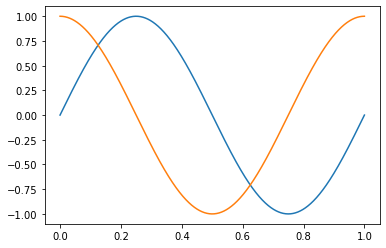

In [169]:
plot(scale_by_tau(math.sin))
plot(scale_by_tau(math.cos))


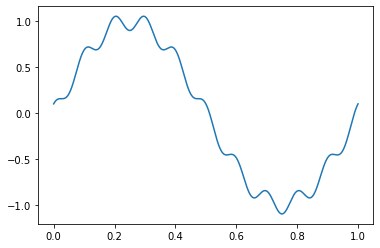

In [170]:
@scale_by_tau
def wave(x):
  return 0.1*math.cos(10*x) + math.sin(x)
plot(wave)

Напоминание синтаксиса Python: `*args` и `**kwargs` позволяют функции принимать необязательные аргументы

In [171]:
def foo(required, *args, **kwargs):
    print('required arg:', required)
    if args:
        print('args:', args)
    if kwargs:
        print('kwargs:', kwargs)

In [172]:
try:
  foo()
except Exception as e:
  print(e)

foo() missing 1 required positional argument: 'required'


In [173]:
foo('hi')

required arg: hi


In [174]:
foo('hi', 1, 2, 3)

required arg: hi
args: (1, 2, 3)


In [175]:
foo('hi', 1, 2, 3, v1=999, v2=None)

required arg: hi
args: (1, 2, 3)
kwargs: {'v1': 999, 'v2': None}


Декораторы часто применяют для уменьшения количества служебного кода. Хотя они являются функциями высшего уровня, они часто используются чтобы добавить к функции побочные эффекты.

In [176]:
def logging(foo):
  def logging_inner(*args, **kwargs):
    arg_str = ', '.join(repr(a) for a in args)
    kwarg_str = ', '.join(f"{k}={v!r}" for k, v in kwargs.items())
    call_str = f"{foo.__name__}({arg_str}, {kwarg_str})"
    print(f"Begin {call_str}")
    result = foo(*args, **kwargs)
    print(f"End {call_str}")
    return result
  return logging_inner

In [177]:
@logging
def hello(who="world"):
  print(f"Hello {who}!")

In [178]:
hello()

Begin hello(, )
Hello world!
End hello(, )


In [179]:
hello("students")

Begin hello('students', )
Hello students!
End hello('students', )


In [180]:
hello(who="there")

Begin hello(, who='there')
Hello there!
End hello(, who='there')


In [181]:
from functools import lru_cache

@logging
@lru_cache(None)
def factorial(n):
  if n==0:
    return 1
  return n*factorial(n-1)

factorial(6)

Begin factorial(6, )
Begin factorial(5, )
Begin factorial(4, )
Begin factorial(3, )
Begin factorial(2, )
Begin factorial(1, )
Begin factorial(0, )
End factorial(0, )
End factorial(1, )
End factorial(2, )
End factorial(3, )
End factorial(4, )
End factorial(5, )
End factorial(6, )


720

In [182]:
factorial(8)

Begin factorial(8, )
Begin factorial(7, )
Begin factorial(6, )
End factorial(6, )
End factorial(7, )
End factorial(8, )


40320

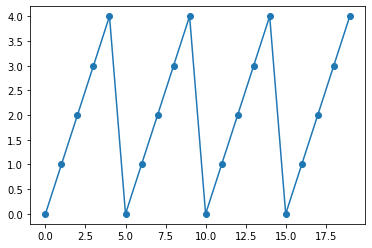

In [183]:
def plot_discrete(foo, values=range(20)):
  y = [foo(x) for x in values]
  plt.scatter(values, y)
  plt.plot(values, y)

plot_discrete(lambda n: n%5)

## Задание 3

1. с помощью Timer напишите функцию высшего порядка `my_timeit(foo)`, результат которой - функция подсчёта времени работы foo для разных входных значений, и которую можно подать на вход `plot_discrete`
2. Задекорируйте рекурсивную функцию fib из задания 1.1 для кеширования результатов, сравните как изменилось время работы с помощью `plot_discrete(my_timeit(...)))`

1

*функция написана в 1.3*

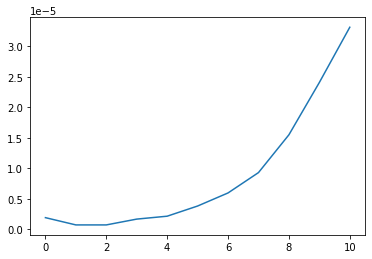

In [184]:
plot_discrete1(my_timeit1(fib1))

In [185]:
@lru_cache(None)
def cached_fib1(n):
  if n==0:
    return 0
  if n in (1, 2):
    return 1
  return cached_fib1(n-1)+cached_fib1(n-2)

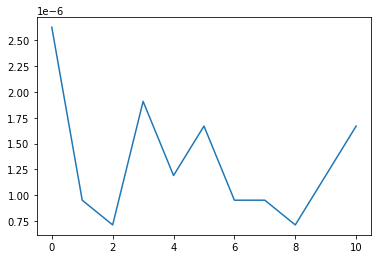

In [186]:
plot_discrete1(my_timeit1(cached_fib1))

# Некоторые функции высшего порядка

## Частичное задание параметров

Один из примеров когда используется функция с функцией на входе и на выходе.

Модуль `functools` стандартной библиотеки - сборник функций высокого уровня
https://docs.python.org/3/library/functools.html

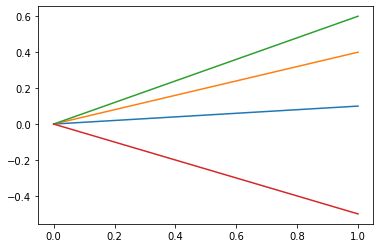

In [187]:
from functools import partial

line_through_0 = partial(parabola, 0, c=0)

for k in (0.1, 0.4, 0.6, -0.5):
  plot(line_through_0(k))

## Map

принимает объект-функцию и итерируемый объект и затем вызывает эту функцию с каждым элементом итерируемого объекта, выдавая результат по мере прохождения итерируемого объекта

In [188]:
map(abs, [1, -2, 3])

In [189]:
map.__iter__

<slot wrapper '__iter__' of 'map' objects>

In [190]:
list(map(abs, [1, -2, 3]))

[1, 2, 3]

In [191]:
[abs(x) for x in [1, -2, 3]]

[1, 2, 3]

In [192]:
" ".join(
    map(
        str.capitalize,
        ['hello', 'world']
    )
)

'Hello World'

In [193]:
input = [1, 2, 3]
foo = lambda x: x**2

def map_generator(f, data):
  for v in data:
    yield f(v)

map_generator2 = lambda f, data: (f(v) for v in data)

map_list = lambda f, data: [f(v) for v in data]

for mapper in (map, map_generator, map_generator2, map_list):
  result = mapper(foo, input)
  print(type(result))
  print(list(result))

<class 'map'>
[1, 4, 9]
<class 'generator'>
[1, 4, 9]
<class 'generator'>
[1, 4, 9]
<class 'list'>
[1, 4, 9]


In [194]:
list(
    islice(
        map(
            hex,
            powers_of_2()
        ),
    10)
)

['0x1', '0x2', '0x4', '0x8', '0x10', '0x20', '0x40', '0x80', '0x100', '0x200']

## Filter

In [195]:
list(filter(lambda n: n%3==1, range(10)))

[1, 4, 7]

In [196]:
[n for n in range(10) if n%3==1]

[1, 4, 7]

## Reduce

In [197]:
from functools import reduce
reduce(lambda s, x: s + x, [1, 2, 3, 4])

10

In [198]:
sum(range(5))

10

In [199]:
sum((x**2 for x in range(5)))

30

In [200]:
reduce(lambda s, c: s + c,
        map(lambda x: x**2, range(5)))

30

## Задание 4
Напишите функцию, производяющую с помощью reduce композицию функций из списка по порядку.
С помощью неё создайте функцию [сигмоиды](https://ru.wikipedia.org/wiki/%D0%A1%D0%B8%D0%B3%D0%BC%D0%BE%D0%B8%D0%B4%D0%B0) `1 / (1 + e**(-x))` из 
`inc`, `reciprocal`, `negate` и `math.exp`

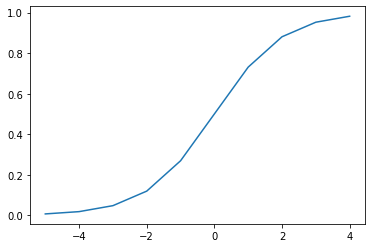

In [201]:
from typing import Callable, List

def plot_symmetric(foo):
  x_space = np.linspace(-10, 10, num=1000)
  y = [foo(x) for x in x_space]
  plt.plot(x_space, y)


def compose_all(functions: List[Callable]) -> Callable:
  def compose(main, inner):
    def result_function(x):
      return inner(main(x))
    return result_function
  return reduce(compose, functions)

sigmoid = compose_all([np.negative, np.exp, lambda x: x+1, np.reciprocal])
plot_discrete1(sigmoid, range(-5, 5))